In [1]:
## Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## Importing the data

In [2]:
#reading the data
host = pd.read_csv(r"C:\Users\suchi\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\hosts.csv")

In [3]:
#reading the data
calendar = pd.read_csv(r"C:\Users\suchi\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\calendar.csv")

In [4]:
#reading the data
listings = pd.read_csv(r"C:\Users\suchi\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\listings.csv")

In [5]:
#reading the data
review = pd.read_csv(r"C:\Users\suchi\Downloads\AirBnb_ABADS-20240316T083308Z-001\AirBnb_ABADS\reviews.csv")

## Look at the table Calendar how many rows and unique listing ids are present? Are there any implications when it comes to having more rows and less unique listing ids?

In [6]:
num_rows = len(calendar)
unique_listing_ids = calendar['listing_id'].nunique()
print("Number of rows in the Calendar table:", num_rows)
print("Number of unique listing IDs:", unique_listing_ids)

Number of rows in the Calendar table: 319192
Number of unique listing IDs: 1749


- Expanding the number of rows while reducing unique identifiers within a table introduces formidable hurdles in data management and analysis. The surge in rows exacerbates concerns about data redundancy and integrity, complicating maintenance efforts to synchronize and uphold consistency. Analytical tasks become more intricate, demanding additional computational resources and time due to the heightened complexity of querying and interpreting results. Moreover, performance optimization becomes imperative to mitigate the strain on computational resources and maintain system responsiveness. Balancing resource utilization becomes challenging, requiring efficient allocation strategies to manage the increased demand. Ongoing data maintenance becomes labor-intensive, necessitating robust governance frameworks and proactive practices to preserve data quality amidst the heightened volume of data. Addressing these challenges mandates a comprehensive approach integrating data governance, optimization strategies, and proactive maintenance to sustain data integrity and maximize analytical efficacy.

## Look at the price column in Calendar table. What transformations you will need to perform.so that you can create a column that can be used as a target/response variable?

In [7]:
calendar.head()

,calender_id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,100.0,2,1125


##### The potential transformation involves dropping the "adjusted price" column and utilizing the "price" column for analysis, thereby creating the "price" column as the target variable. 

In [8]:
# Drop the 'adjusted_price' column from the Calendar table in place
calendar.drop('adjusted_price', axis=1, inplace=True)

In [9]:
calendar.head()

,calender_id,listing_id,date,available,price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03 00:00:00.000000,0,56.0,3,5
1,2,22742449,2022-11-13 00:00:00.000000,1,95.0,2,99
2,3,34621717,2022-04-17 00:00:00.000000,0,75.0,2,1125
3,4,38281744,2022-01-31 00:00:00.000000,1,150.0,1,1000
4,5,18835003,2022-05-21 00:00:00.000000,0,100.0,2,1125


##### Additionally, converting the "date" column to datetime format constitutes another transformation. This adjustment enhances the dataset's usability by ensuring consistency and facilitating temporal analysis.

In [10]:
calendar['date']=calendar['date'].str[0:10]

In [11]:
calendar.head()

,calender_id,listing_id,date,available,price,minimum_nights,maximum_nights
0,1,40334325,2022-08-03,0,56.0,3,5
1,2,22742449,2022-11-13,1,95.0,2,99
2,3,34621717,2022-04-17,0,75.0,2,1125
3,4,38281744,2022-01-31,1,150.0,1,1000
4,5,18835003,2022-05-21,0,100.0,2,1125


In [12]:
# Convert the 'date' column to datetime format
calendar['date'] = pd.to_datetime(calendar['date'])

In [13]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319192 entries, 0 to 319191
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   calender_id     319192 non-null  int64         
 1   listing_id      319192 non-null  int64         
 2   date            319192 non-null  datetime64[ns]
 3   available       319192 non-null  int64         
 4   price           319117 non-null  float64       
 5   minimum_nights  319192 non-null  int64         
 6   maximum_nights  319192 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 17.0 MB


##### Checking for NULL VALUES

In [14]:
#checking for null values
calendar.isnull().sum()

calender_id        0
listing_id         0
date               0
available          0
price             75
minimum_nights     0
maximum_nights     0
dtype: int64

In [15]:
# Drop rows with missing values
calendar.dropna(inplace=True)

In [16]:
calendar.isnull().sum()

calender_id       0
listing_id        0
date              0
available         0
price             0
minimum_nights    0
maximum_nights    0
dtype: int64

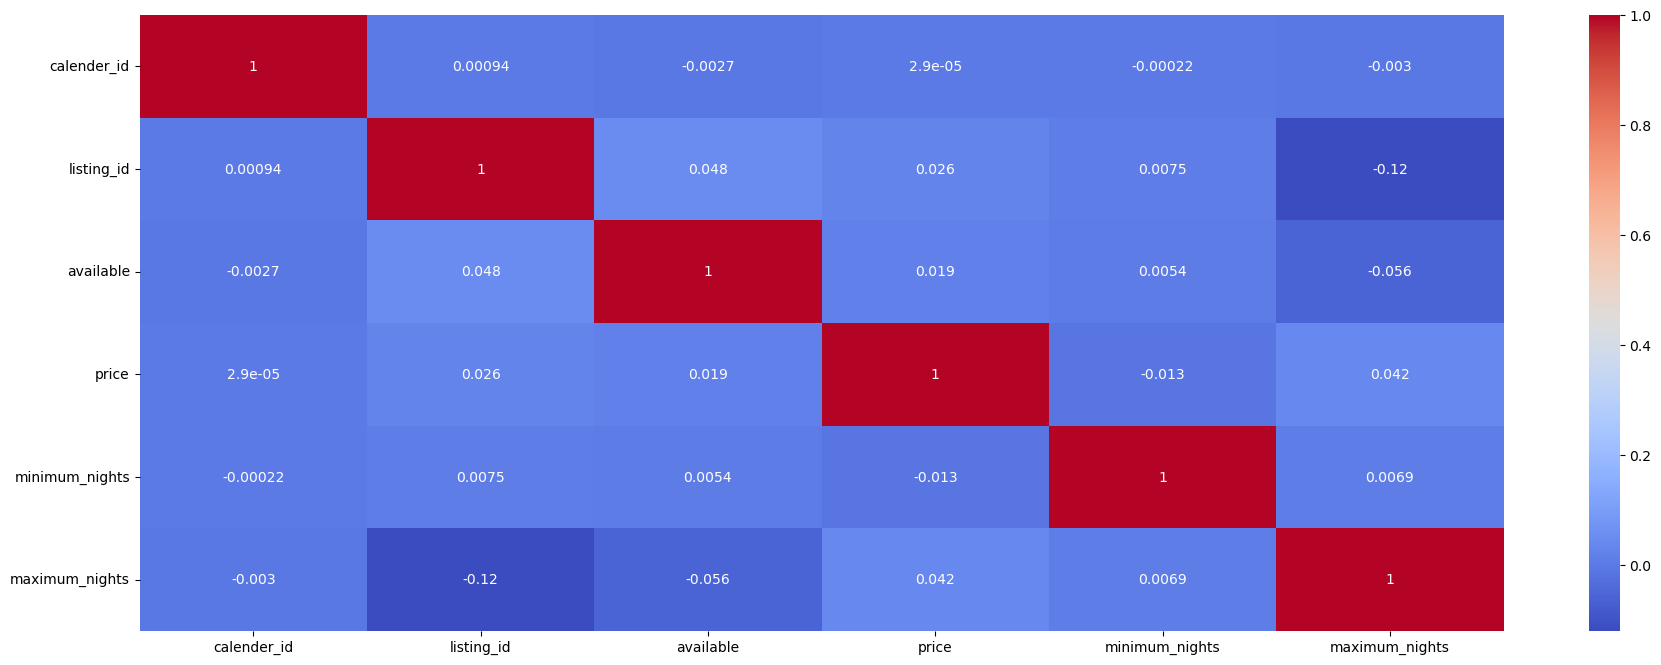

In [64]:
# Create the heatmap of the correlation matrix with annotations
plt.figure(figsize=(22,8))
sns.heatmap(calendar.corr(),annot=True,cmap='coolwarm')
plt.show()

### Look at the tables Listings, Hosts and Reviews to come up with a list of potential transformations needed in order to have predictors that can be used to predict the listing price.

In [18]:
host.head()

,host_id,host_name,host_since,host_location,host_about
0,234077,Karin,2010-09-14 00:00:00.000000,"Antwerp, Flanders, Belgium",Ever since my childhood I dreamt of having my ...
1,334804,Ann,2011-01-04 00:00:00.000000,"Antwerp, Flemish Region, Belgium","Ciao, \r\nlooking forward to meet you!\r\nI lo..."
2,413052,Valérie,2011-02-27 00:00:00.000000,"Antwerp, Flanders, Belgium",NaN
3,452791,Tatiana,2011-03-20 00:00:00.000000,"Antwerp, Flanders, Belgium",World traveler with a penchant for adrenaline ...
4,462975,Els,2011-03-25 00:00:00.000000,"Edegem, Flanders, Belgium",I studied languages and cultural anthropology ...


In [19]:
review.head()

,review_id,listing_id,date,reviewer_id,reviewer_name,comments
0,1,50904,2015-05-06 00:00:00.000000,19482395,Jihae,Karin’s “Aplace” is absolutely beautiful and c...
1,2,50904,2021-10-10 00:00:00.000000,333559,Emilie,"Karin is a wonderful host, she was really help..."
2,3,116134,2012-03-05 00:00:00.000000,928644,Aurélien,"Amazing flat, really close from the MAS Musem,..."
3,4,116134,2012-05-25 00:00:00.000000,231288,Gail,"This is a well equipped, very comfortable apar..."
4,5,116134,2013-09-03 00:00:00.000000,7984251,Marcel,This is a very nice appartement. We really lik...


In [20]:
listings.head()

,listing_id,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,50904,https://www.airbnb.com/rooms/50904,aplace/antwerp: cosy suite - fashion district,Decorated in a vintage style combined with a f...,51.218575,4.398631,Room in boutique hotel,Hotel room,2,1 private bath,1.0,1.0,"[""Kitchen"", ""Smoke alarm"", ""Hair dryer"", ""Keyp...",234077
1,116134,https://www.airbnb.com/rooms/116134,Spacious apartment nearby Mas,Enjoy your stay at our 4 person apartment in t...,51.230510,4.405930,Entire rental unit,Entire home/apt,4,2.5 baths,2.0,2.0,"[""Refrigerator"", ""Elevator"", ""Paid street park...",586942
2,218916,https://www.airbnb.com/rooms/218916,Apartment with terrace in trendy Zurenborg,Do you enjoy authentic places with a lot of ch...,51.206330,4.429420,Entire condominium (condo),Entire home/apt,5,1 bath,1.0,3.0,"[""Paid street parking off premises"", ""Kitchen""...",915664
3,224333,https://www.airbnb.com/rooms/224333,Large stylish room in 1930s house + garden,"Large bedroom in classic 1930s house. Kitchen,...",51.197720,4.458530,Private room in residential home,Private room,2,2 shared baths,1.0,1.0,"[""Fire extinguisher"", ""Backyard"", ""Long term s...",1167377
4,224682,https://www.airbnb.com/rooms/224682,APARTMENT ROSCAM - OLD CENTRE ANTWERP,"<b>The space</b><br />Apartment ""Roscam"" is a ...",51.217220,4.397900,Entire rental unit,Entire home/apt,3,1 bath,1.0,2.0,"[""Refrigerator"", ""Kitchen"", ""Smoke alarm"", ""Sh...",1263933


In [21]:
host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   host_id        1111 non-null   int64 
 1   host_name      1111 non-null   object
 2   host_since     1111 non-null   object
 3   host_location  1108 non-null   object
 4   host_about     490 non-null    object
dtypes: int64(1), object(4)
memory usage: 43.5+ KB


In [22]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      1749 non-null   int64  
 1   listing_url     1749 non-null   object 
 2   name            1749 non-null   object 
 3   description     1679 non-null   object 
 4   latitude        1749 non-null   float64
 5   longitude       1749 non-null   float64
 6   property_type   1749 non-null   object 
 7   room_type       1749 non-null   object 
 8   accomodates     1749 non-null   int64  
 9   bathrooms_text  1749 non-null   object 
 10  bedrooms        1621 non-null   float64
 11  beds            1708 non-null   float64
 12  amenities       1749 non-null   object 
 13  host_id         1749 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 191.4+ KB


In [23]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62987 entries, 0 to 62986
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review_id      62987 non-null  int64 
 1   listing_id     62987 non-null  int64 
 2   date           62987 non-null  object
 3   reviewer_id    62987 non-null  int64 
 4   reviewer_name  62987 non-null  object
 5   comments       62923 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.9+ MB


In [24]:
#rows and columns 
host.shape

(1111, 5)

In [25]:
#rows and columns 
review.shape

(62987, 6)

In [26]:
#rows and columns 
listings.shape

(1749, 14)

-  The "host" and "review" columns may not contribute significantly to the analysis and could be considered for removal.  -    Doing so would streamline the dataset by reducing redundancy and enhancing clarity.

## Create an aggregated view of data spread across different tables, containing the target as well as predictor variables.

#### Aggregated view of data 

In [27]:
# Merge All Data set(calendar table and listing)
df = calendar.merge(listings)

In [28]:
df.isna().sum()

calender_id           0
listing_id            0
date                  0
available             0
price                 0
minimum_nights        0
maximum_nights        0
listing_url           0
name                  0
description       12703
latitude              0
longitude             0
property_type         0
room_type             0
accomodates           0
bathrooms_text        0
bedrooms          23376
beds               7428
amenities             0
host_id               0
dtype: int64

In [29]:
df.head()

,calender_id,listing_id,date,available,price,minimum_nights,maximum_nights,listing_url,name,description,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities,host_id
0,1,40334325,2022-08-03,0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587
1,2109,40334325,2022-02-14,1,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587
2,3617,40334325,2022-04-26,0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587
3,5560,40334325,2022-04-08,0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587
4,8188,40334325,2022-04-11,0,56.0,3,5,https://www.airbnb.com/rooms/40334325,Luxurious flat in central location,Luxurious flat in Antwerp close to various pub...,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,NaN,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc...",311556587


#### Imputing null values with Median

In [30]:
df["bedrooms"].fillna(df["bedrooms"].median(), inplace=True)

In [31]:
df["beds"].fillna(df["beds"].median(),inplace= True)

In [32]:
df.isnull().sum()

calender_id           0
listing_id            0
date                  0
available             0
price                 0
minimum_nights        0
maximum_nights        0
listing_url           0
name                  0
description       12703
latitude              0
longitude             0
property_type         0
room_type             0
accomodates           0
bathrooms_text        0
bedrooms              0
beds                  0
amenities             0
host_id               0
dtype: int64

#### Dropping description column

In [33]:
df.drop("description",axis=1,inplace=True)

#### Dropping columns not necessary fo analysis

In [34]:
df.drop(["calender_id","listing_id","listing_url","host_id"],axis=1,inplace=True)

In [35]:
#rows and columns 
df.shape

(319117, 15)

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319117 entries, 0 to 319116
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            319117 non-null  datetime64[ns]
 1   available       319117 non-null  int64         
 2   price           319117 non-null  float64       
 3   minimum_nights  319117 non-null  int64         
 4   maximum_nights  319117 non-null  int64         
 5   name            319117 non-null  object        
 6   latitude        319117 non-null  float64       
 7   longitude       319117 non-null  float64       
 8   property_type   319117 non-null  object        
 9   room_type       319117 non-null  object        
 10  accomodates     319117 non-null  int64         
 11  bathrooms_text  319117 non-null  object        
 12  bedrooms        319117 non-null  float64       
 13  beds            319117 non-null  float64       
 14  amenities       319117 non-null  obj

In [37]:
df.head()

,date,available,price,minimum_nights,maximum_nights,name,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities
0,2022-08-03,0,56.0,3,5,Luxurious flat in central location,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
1,2022-02-14,1,56.0,3,5,Luxurious flat in central location,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
2,2022-04-26,0,56.0,3,5,Luxurious flat in central location,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
3,2022-04-08,0,56.0,3,5,Luxurious flat in central location,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc..."
4,2022-04-11,0,56.0,3,5,Luxurious flat in central location,51.20989,4.42298,Entire rental unit,Entire home/apt,2,1 bath,1.0,2.0,"[""Hot water"", ""Refrigerator"", ""Private entranc..."


## Data Quality and checks (Task 1):

#### • Once the aggregated dataset has been created, do a data audit. Create a data quality report which has the following basic structure:


#### • Continuous Variables: (#unique values, percentage_missing_values, min, max, average, 25th percentile, 75th percentile, 90th percentile, 95th percentile)


#### • Categorical Variables: (#Unique values, percentage_missing_values)


#### • Highlight any data anomaly that you find and fix it

In [38]:
print("Numbers of unique values")
unique_values = df['available'].unique()
print("available:",len(unique_values))

unique_values = df['price'].unique()
print('price:',len(unique_values))

unique_values = df['minimum_nights'].unique()
print("minimum_nights:",len(unique_values))

unique_values = df['maximum_nights'].unique()
print("maximum_nights:",len(unique_values))



Numbers of unique values
available: 2
price: 598
minimum_nights: 36
maximum_nights: 208


In [39]:
df.describe()

,available,price,minimum_nights,maximum_nights,latitude,longitude,accomodates,bedrooms,beds
count,319117.000000,319117.000000,319117.000000,319117.000000,319117.000000,319117.000000,319117.000000,319117.000000,319117.000000
mean,0.535318,109.917779,5.378855,812.348245,51.214075,4.413152,3.762564,1.490165,2.217651
std,0.498752,185.791168,21.458047,511.557606,0.013732,0.019367,2.771782,1.065766,2.223190
min,0.000000,13.000000,1.000000,1.000000,51.160084,4.290770,1.000000,1.000000,1.000000
25%,0.000000,59.000000,1.000000,365.000000,51.207870,4.400140,2.000000,1.000000,1.000000
50%,1.000000,79.000000,2.000000,1125.000000,51.216550,4.409460,3.000000,1.000000,2.000000
75%,1.000000,115.000000,3.000000,1125.000000,51.220880,4.424660,4.000000,2.000000,3.000000
max,1.000000,5800.000000,500.000000,9999.000000,51.349400,4.483470,16.000000,20.000000,44.000000


In [40]:
print("90th percentile \n", df.quantile(0.9))
print(" ")
print("95th percentile \n", df.quantile(0.95))

90th percentile 
 available            1.00000
price              180.00000
minimum_nights       7.00000
maximum_nights    1125.00000
latitude            51.22572
longitude            4.43905
accomodates          7.00000
bedrooms             2.00000
beds                 4.00000
Name: 0.9, dtype: float64
 
95th percentile 
 available            1.00000
price              250.00000
minimum_nights      25.00000
maximum_nights    1125.00000
latitude            51.23058
longitude            4.44767
accomodates         10.00000
bedrooms             3.00000
beds                 5.00000
Name: 0.95, dtype: float64


C:\Users\suchi\AppData\Local\Temp\ipykernel_7056\116345576.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("90th percentile \n", df.quantile(0.9))
C:\Users\suchi\AppData\Local\Temp\ipykernel_7056\116345576.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("95th percentile \n", df.quantile(0.95))


##  Variable profiling and checking relationships between variables (Task 2):


#### • Assess the relationship between target and predictor variables. You can compute correlations, plot bivariate relationships

#### •  Based on the above analysis summarize your findings and list down the transformations you will do on different predictors, remove the variables from further analysis

C:\Users\suchi\AppData\Local\Temp\ipykernel_7056\1110134545.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


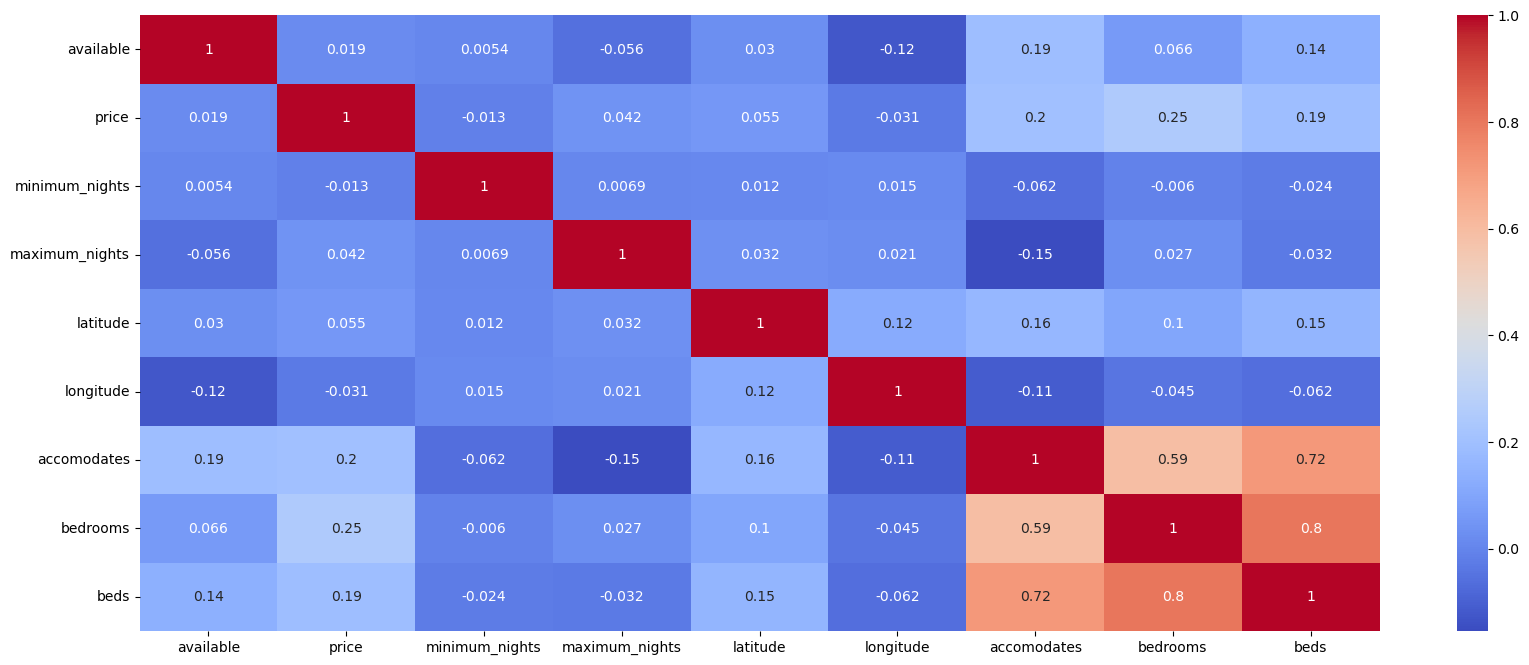

In [41]:
# Create the heatmap of the correlation matrix with annotations
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

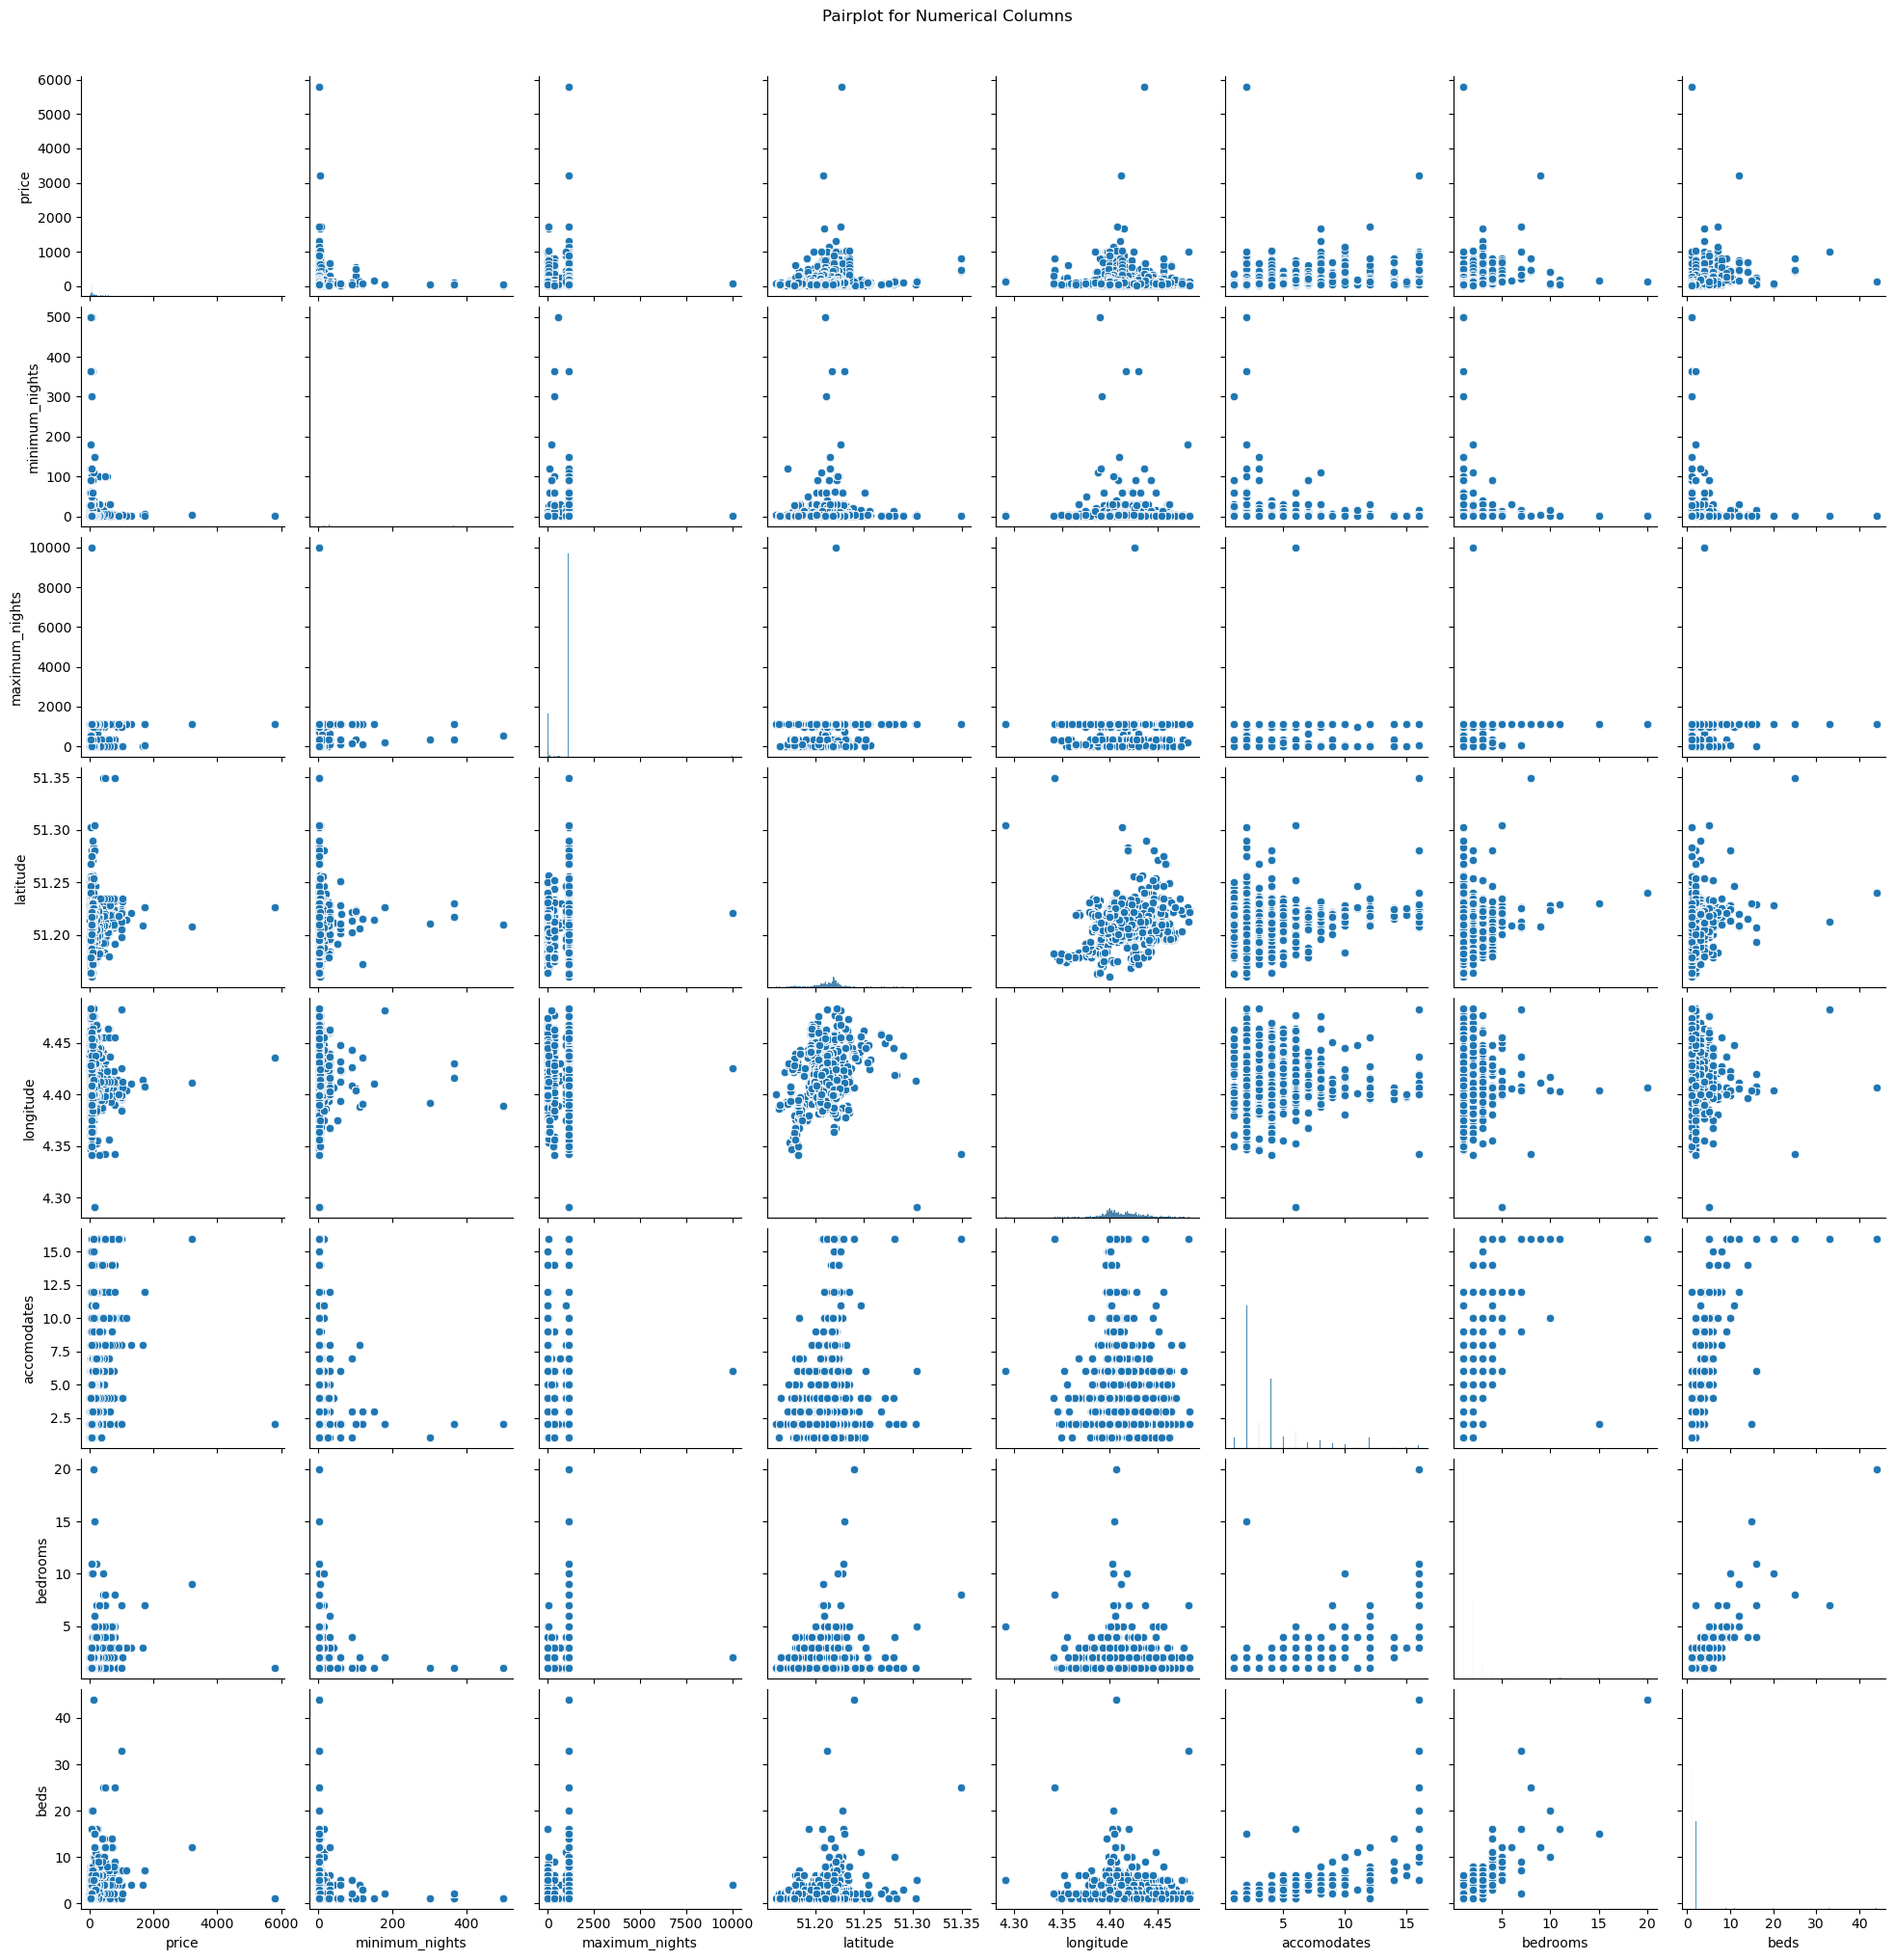

<Figure size 640x480 with 0 Axes>

In [42]:
# EDA with Graphs and Charts
# List of numerical columns for EDA
numerical_columns = ['price', 'minimum_nights', 'maximum_nights', 'latitude', 'longitude',
                     'accomodates', 'bedrooms', 'beds', 'amenities']

# Pairplot for numerical columns
sns.pairplot(df[numerical_columns].dropna())
plt.suptitle('Pairplot for Numerical Columns', y=1.02)
plt.show()
plt.tight_layout()
plt.show()

<Axes: >

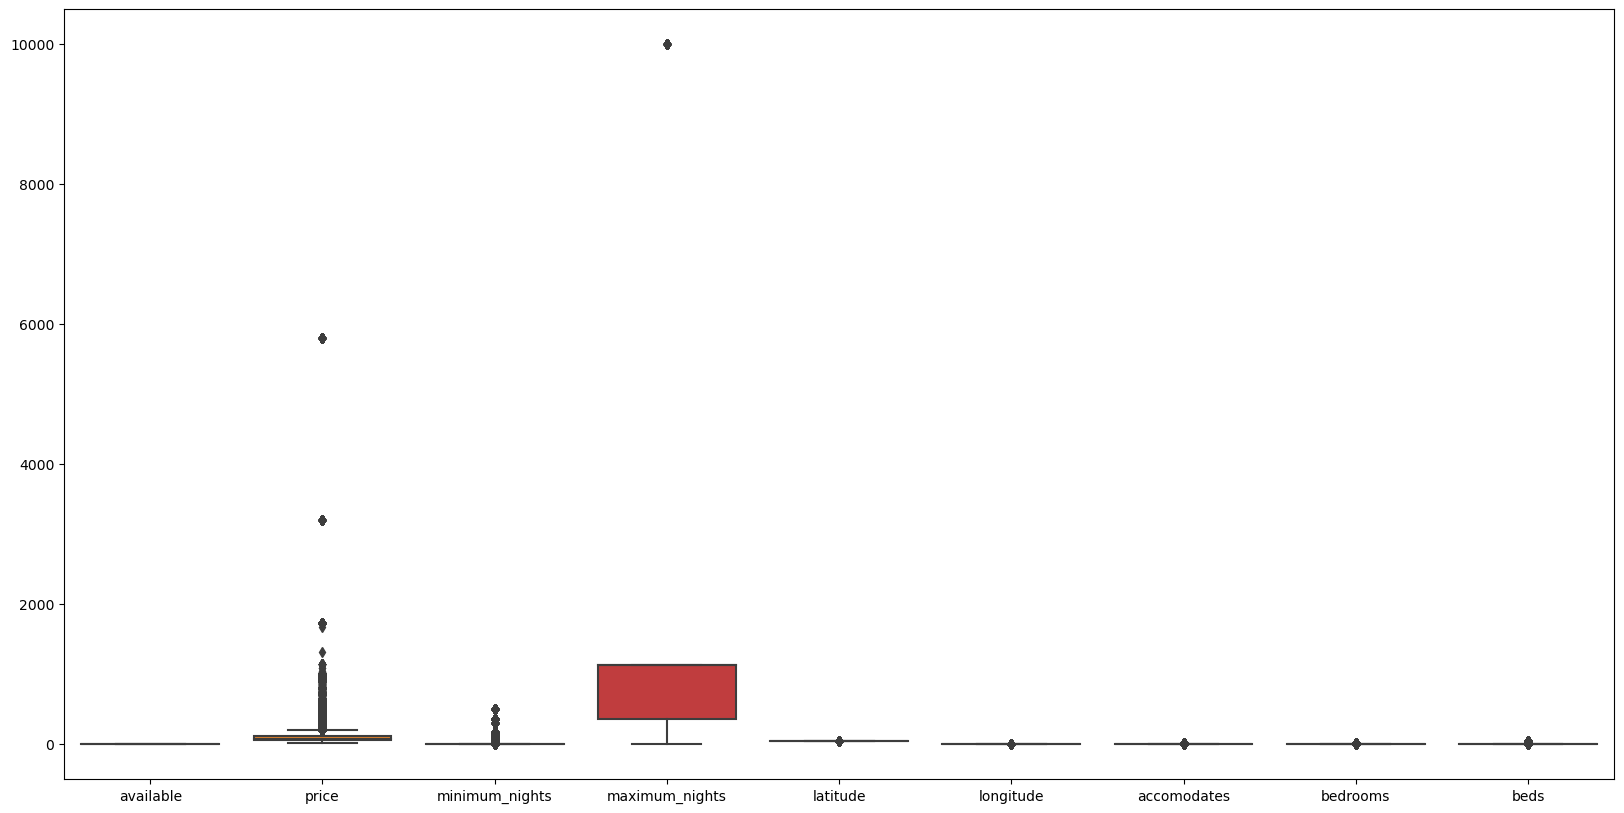

In [43]:
# Create the boxplot using Seaborn
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319117 entries, 0 to 319116
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            319117 non-null  datetime64[ns]
 1   available       319117 non-null  int64         
 2   price           319117 non-null  float64       
 3   minimum_nights  319117 non-null  int64         
 4   maximum_nights  319117 non-null  int64         
 5   name            319117 non-null  object        
 6   latitude        319117 non-null  float64       
 7   longitude       319117 non-null  float64       
 8   property_type   319117 non-null  object        
 9   room_type       319117 non-null  object        
 10  accomodates     319117 non-null  int64         
 11  bathrooms_text  319117 non-null  object        
 12  bedrooms        319117 non-null  float64       
 13  beds            319117 non-null  float64       
 14  amenities       319117 non-null  obj

## Modelling and insights (Task 2):

- In the modeling process, it's crucial to first address outliers before performing label encoding. Outliers, being data points significantly distant from others, can distort the model's performance and predictive accuracy. Therefore, identifying and managing outliers helps ensure the robustness of the model. Once outliers are handled, label encoding can be applied to categorical variables to convert them into numerical format, enabling the model to interpret them effectively. This sequential approach ensures that the data is appropriately preprocessed, setting a solid foundation for building accurate and reliable predictive models.

In [48]:
# Calculate the first quartile (Q1)
Q1 = df['minimum_nights'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['minimum_nights'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['minimum_nights'] < lower_bound) | (df['minimum_nights'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers detected using IQR method:", num_outliers)

Number of outliers detected using IQR method: 40812


In [49]:
# Calculate the first quartile (Q1)
Q1 = df['maximum_nights'].quantile(0.25)

# Calculate the third quartile (Q3)
Q3 = df['maximum_nights'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['maximum_nights'] < lower_bound) | (df['maximum_nights'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers detected using IQR method:", num_outliers)

Number of outliers detected using IQR method: 158


In [50]:
# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
df['property_type'] = pd.Series(le.fit_transform(df['property_type']))
df['room_type'] = pd.Series(le.fit_transform(df['room_type']))
df['bathrooms_text'] = pd.Series(le.fit_transform(df['bathrooms_text']))
df['amenities'] = pd.Series(le.fit_transform(df['amenities']))
df['date'] = pd.Series(le.fit_transform(df['date']))
df['latitude'] = pd.Series(le.fit_transform(df['latitude']))
df['longitude'] = pd.Series(le.fit_transform(df['longitude']))
df['name'] = pd.Series(le.fit_transform(df['name']))

In [51]:
df.head()

,date,available,price,minimum_nights,maximum_nights,name,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities
0,220,0,56.0,3,5,906,472,1055,8,0,2,2,1.0,2.0,408
1,50,1,56.0,3,5,906,472,1055,8,0,2,2,1.0,2.0,408
2,121,0,56.0,3,5,906,472,1055,8,0,2,2,1.0,2.0,408
3,103,0,56.0,3,5,906,472,1055,8,0,2,2,1.0,2.0,408
4,106,0,56.0,3,5,906,472,1055,8,0,2,2,1.0,2.0,408


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319117 entries, 0 to 319116
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            319117 non-null  int64  
 1   available       319117 non-null  int64  
 2   price           319117 non-null  float64
 3   minimum_nights  319117 non-null  int64  
 4   maximum_nights  319117 non-null  int64  
 5   name            319117 non-null  int32  
 6   latitude        319117 non-null  int64  
 7   longitude       319117 non-null  int64  
 8   property_type   319117 non-null  int32  
 9   room_type       319117 non-null  int32  
 10  accomodates     319117 non-null  int64  
 11  bathrooms_text  319117 non-null  int32  
 12  bedrooms        319117 non-null  float64
 13  beds            319117 non-null  float64
 14  amenities       319117 non-null  int32  
dtypes: float64(3), int32(5), int64(7)
memory usage: 32.9 MB


In [53]:
# Convert columns to integer type
df['beds']=df['beds'].astype(int)
df['bedrooms']=df['bedrooms'].astype(int)
df['price']=df['price'].astype(int)

In [54]:
df.head()

,date,available,price,minimum_nights,maximum_nights,name,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities
0,220,0,56,3,5,906,472,1055,8,0,2,2,1,2,408
1,50,1,56,3,5,906,472,1055,8,0,2,2,1,2,408
2,121,0,56,3,5,906,472,1055,8,0,2,2,1,2,408
3,103,0,56,3,5,906,472,1055,8,0,2,2,1,2,408
4,106,0,56,3,5,906,472,1055,8,0,2,2,1,2,408


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319117 entries, 0 to 319116
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   date            319117 non-null  int64
 1   available       319117 non-null  int64
 2   price           319117 non-null  int32
 3   minimum_nights  319117 non-null  int64
 4   maximum_nights  319117 non-null  int64
 5   name            319117 non-null  int32
 6   latitude        319117 non-null  int64
 7   longitude       319117 non-null  int64
 8   property_type   319117 non-null  int32
 9   room_type       319117 non-null  int32
 10  accomodates     319117 non-null  int64
 11  bathrooms_text  319117 non-null  int32
 12  bedrooms        319117 non-null  int32
 13  beds            319117 non-null  int32
 14  amenities       319117 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 29.2 MB


##  Explain your approach on creating train/test/validation splits

- 1.Importing Libraries: Begin by importing the required libraries from scikit-learn.
- 2.Data Splitting: The dataset is initially divided into two parts, separating the target variable from the features.
- 3.Train/Test Split: Develop a train/test split to assess the model's performance during development.
- 4.Train/Validation Split: Further divide the training data into train/validation sets to facilitate model selection and  
  tuning.

In [56]:
from sklearn.model_selection import train_test_split
# Assuming you have a DataFrame df with features and a target column 'target_column'
X = df.drop('price',axis=1)
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create a comparison matrix to compare different regression models you've run

In [57]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [58]:
from lazypredict.Supervised import LazyRegressor
# Assuming 'X' contains your features and 'y' is your target variable
X = df.drop('price', axis=1)  # Drop the target column from features
y = df['price']  # Extract the target column

In [59]:
# Initialize LazyRegressor
regressor = LazyRegressor(predictions=True, random_state=42)
# Fit LazyRegressor to training data
models, predictions = regressor.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [4:10:46<10:07, 607.57s/it]    

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1497
[LightGBM] [Info] Number of data points in the train set: 255293, number of used features: 14
[LightGBM] [Info] Start training from score 110.109220


100%|██████████| 42/42 [4:10:47<00:00, 358.26s/it]


In [60]:
# Display the performance metrics of evaluated models
print(models)

                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
RandomForestRegressor                        0.99       0.99  19.24   
BaggingRegressor                             0.99       0.99  19.64   
ExtraTreesRegressor                          0.99       0.99  21.76   
DecisionTreeRegressor                        0.98       0.98  22.65   
KNeighborsRegressor                          0.98       0.98  23.28   
XGBRegressor                                 0.98       0.98  24.19   
ExtraTreeRegressor                           0.98       0.98  25.72   
HistGradientBoostingRegressor                0.97       0.97  30.51   
LGBMRegressor                                0.97       0.97  30.74   
MLPRegressor                                 0.86       0.86  66.03   
GradientBoostingRegressor                    0.86       0.86  67.60   
AdaBoostRegressor                            0.35       0.35 143.96   
Poisso

## Experiment with Linear Regression, Regression Trees, Random Forest Regressor and GBM. Not compulsory but you can also experiment with Xgboost, Lightgbm

In [61]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 368.590021474657
R-squared: 0.9884140216525394


## Explain which model you've finalized and why you finalize the model.

- The finalized model is the RANDOM FOREST REGRESSOR, chosen for its robustness in handling outliers. Its superior R-squared value and lower Mean Squared Error (MSE) of 368.59 further support this choice. The Random Forest model's ability to resist the impact of outliers adds to its reliability in real-world scenarios. This resilience allows the model to maintain predictive accuracy even with data points that significantly differ from the norm. Therefore, combining excellent performance metrics with inherent robustness, the Random Forest Regressor stands out as the optimal selection for this task, ensuring both precision and resilience in predictive modeling.

## Explain what the top 5 most important predictors are and also explain the direction of impact of these top 5 predictors on the response variable.

In [62]:
df.corr()

,date,available,price,minimum_nights,maximum_nights,name,latitude,longitude,property_type,room_type,accomodates,bathrooms_text,bedrooms,beds,amenities
date,1.00,-0.03,0.02,0.00,0.01,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00
available,-0.03,1.00,0.02,0.01,-0.06,0.05,0.04,-0.14,0.00,-0.01,0.19,0.04,0.07,0.14,0.04
price,0.02,0.02,1.00,-0.01,0.04,0.02,0.05,-0.03,-0.02,-0.05,0.20,0.20,0.25,0.19,-0.05
minimum_nights,0.00,0.01,-0.01,1.00,0.01,-0.05,0.02,0.01,-0.06,-0.06,-0.06,-0.01,-0.01,-0.02,-0.06
maximum_nights,0.01,-0.06,0.04,0.01,1.00,-0.11,0.02,0.04,0.01,-0.01,-0.15,-0.03,0.03,-0.03,-0.01
name,-0.00,0.05,0.02,-0.05,-0.11,1.00,0.02,0.02,-0.01,-0.00,0.06,-0.01,-0.03,0.02,0.04
latitude,-0.00,0.04,0.05,0.02,0.02,0.02,1.00,0.06,-0.08,-0.09,0.16,0.05,0.07,0.10,0.07
longitude,-0.00,-0.14,-0.03,0.01,0.04,0.02,0.06,1.00,0.09,0.12,-0.14,0.04,-0.04,-0.07,-0.04
property_type,0.00,0.00,-0.02,-0.06,0.01,-0.01,-0.08,0.09,1.00,0.91,-0.25,0.11,-0.12,-0.12,-0.16
room_type,0.00,-0.01,-0.05,-0.06,-0.01,-0.00,-0.09,0.12,0.91,1.00,-0.27,0.13,-0.13,-0.14,-0.16


- Ranked by correlation strength, the top five predictors are: 1. bedroom count, 2. bathroom count, 3. accommodation capacity, 4. bed count, and 5. property name and availability status on specific dates. These features demonstrate robust correlations with the target variable, implying their substantial predictive influence within the model.
- Overall, these top predictors positively influence the response variable, indicating that properties with more bedrooms, bathrooms, accommodation capacity, an

 The top five predictors, ranked by correlation strength, are as follows:
- Bedroom count
- Bathroom count
- Accommodation capacity
- Bed count
- Property name and availability status on specific dates

These features exhibit strong correlations with the target variable, suggesting their significant predictive power within the model. Importantly, these predictors all positively influence the response variable. This means that properties with more bedrooms, bathrooms, higher accommodation capacity, a greater number of beds, and optimal availability status on specific dates tend to have a positive impact on the outcome being predicted. For example, in a real estate context, a property with more bedrooms and bathrooms might command higher rental or sale prices. Similarly, a hotel with greater accommodation capacity and a higher number of beds might attract more guests, leading to increased revenue. The availability status of a property on specific dates can also directly impact its desirability and, consequently, its performance in the market.






